In [8]:
import os
from moviepy import VideoFileClip, concatenate_videoclips

# Path to the folder containing the MP4 files
folder_path = r"C:\Users\TzachiHNB4\Desktop\condensates\030525\030525\UL14 HSV-1FRAP1.csv"  # Raw string to handle backslashes

# Get a list of all MP4 files in the folder
mp4_files = [f for f in os.listdir(folder_path) if f.endswith(".mp4")]

# Sort the files if necessary (e.g., alphabetically)
mp4_files.sort()

# Load the video clips
video_clips = [VideoFileClip(os.path.join(folder_path, file)) for file in mp4_files]

# Concatenate all the video clips
merged_video = concatenate_videoclips(video_clips)

# Save the merged video
output_path = r"C:\Users\TzachiHNB4\Desktop\condensates\021925\FRAP8\merged_video.mp4"
merged_video.write_videofile(output_path, codec="libx264")

print("Videos merged successfully!")


{'video_found': True, 'audio_found': False, 'metadata': {'major_brand': 'mp41', 'minor_version': '1', 'compatible_brands': 'mp41isom', 'creation_time': '2025-02-21T11:48:02.000000Z'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': 'eng', 'default': True, 'size': [256, 256], 'bitrate': 621, 'fps': 30.0, 'codec_name': 'h264', 'profile': '(Main)', 'metadata': {'Metadata': '', 'creation_time': '2025-02-21T11:48:02.000000Z', 'handler_name': 'Primo Video Handler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 5.0, 'bitrate': 627, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(Main)', 'video_size': [256, 256], 'video_bitrate': 621, 'video_fps': 30.0, 'video_duration': 5.0, 'video_n_frames': 150}
C:\Users\TzachiHNB4\AppData\Local\Programs\Python\Python312\Lib\site-packages\imageio_ffmpeg\binaries\ffmpeg-win-x86_64-v7.1.exe -i C:\Users\TzachiHN

MoviePy - Done !
MoviePy - video ready C:\Users\TzachiHNB4\Desktop\condensates\021925\FRAP8\merged_video.mp4
Videos merged successfully!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load your CSV file (adjust the file path as needed)
csv_file = r"C:\Users\TzachiHNB4\Desktop\condensates\030525\030525\UL14 HSV-1FRAP1.csv"
data = pd.read_csv(csv_file, skiprows=1, encoding='utf-16')

print(data)
# Clean column names by stripping spaces and removing empty brackets (if any)
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
data.columns = data.columns.str.replace(r'\s*\[\]\s*', '', regex=True)  # Remove empty brackets

# Rename specific columns for easier reference
data.rename(columns={
     'ROI.01': 'cytosol1',
    'ROI.02': 'cytosol2',
    'ROI.03': 'cytosol3',
    'ROI.04': 'cytosol4',
    'ROI.05': 'cytosol5',
    'ROI.06': 'cytosol6',
     'ROI.07': 'cytosol7',
     'ROI.08': 'cytosol8'
  
   
    
}, inplace=True)

#data = data.drop('ROI.01.1', axis=1)


# Remove empty columns (columns that are completely NaN or have no values)
data = data.dropna(axis=1, how='all')  # Drop columns that are completely empty

# Remove columns that are mostly zeros (define a threshold to remove columns that have >90% zeros)
data = data.loc[:, (data != 0).mean(axis=0) > 0.1]  # Keep only columns where more than 10% of the data is non-zero

# Replace NaN and Inf with 0
#data = data.replace([np.inf, -np.inf], 0)  # Replace Inf and -Inf with 0
#data = data.fillna(0)  # Replace NaN values with 0
data = data.dropna()

# Display the cleaned DataFrame to verify
print(data)


     Axis [s]  ROI.01 []  ROI.02 []  ROI.03 []  ROI.04 []  ROI.05 []  \
0       0.000   0.304266   0.599721   0.503569   0.440297   0.618098   
1       0.269   0.310232   0.587883   0.511221   0.439736   0.623147   
2       0.536   0.307845   0.611559   0.496142   0.436930   0.629622   
3       0.802   0.314169   0.600813   0.506720   0.446095   0.608890   
4       1.068   0.314647   0.594986   0.498843   0.443103   0.623088   
..        ...        ...        ...        ...        ...        ...   
205   175.567   0.147002   0.181027   0.198277   0.197329   0.210290   
206   176.568   0.142587   0.179570   0.201540   0.191531   0.206310   
207   177.567   0.144854   0.187401   0.206604   0.208552   0.207854   
208   178.568   0.152491   0.185944   0.208404   0.205185   0.209815   
209   179.568   0.146525   0.189769   0.198502   0.201257   0.206726   

     ROI.06 []  ROI.07 []  ROI.08 []  
0     0.990773   0.592111   0.605549  
1     0.992796   0.586937   0.617761  
2     0.985349   0

In [4]:
data.to_csv("FRAP_data_file.csv", index=False)

Adjusted time: first 5 values: [-10.573 -10.304 -10.037  -9.771  -9.505]
Pre-bleach intensities (I_i): [0.31484549 0.59422073 0.50176089 0.43641894 0.61669177 0.9894964
 0.58583956 0.61868407]
Immediate post-bleach intensities (I0): [0.1503431  0.17009996 0.18218502 0.16216544 0.1444703  0.17139504
 0.13609306 0.18359826]
Initial guesses for each ROI: I_inf = [0.14669191 0.1847424  0.20266537 0.20077092 0.20819882 0.22202436
 0.18379113 0.23383335], I0 = [0.1503431  0.17009996 0.18218502 0.16216544 0.1444703  0.17139504
 0.13609306 0.18359826], k = 0.1
Error: curve_fit failed for cytosol1: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Fitted parameters for cytosol2: I_inf = 0.19349519296336115, I0 = 0.170586334729033, k = 0.4433237177307315
Fitted parameters for cytosol3: I_inf = 0.2098140353836057, I0 = 0.19459136079428974, k = 0.013185928013811273
Fitted parameters for cytosol4: I_inf = 0.2121003431958961, I0 = 0.17373129929459094, k = 0.02202268

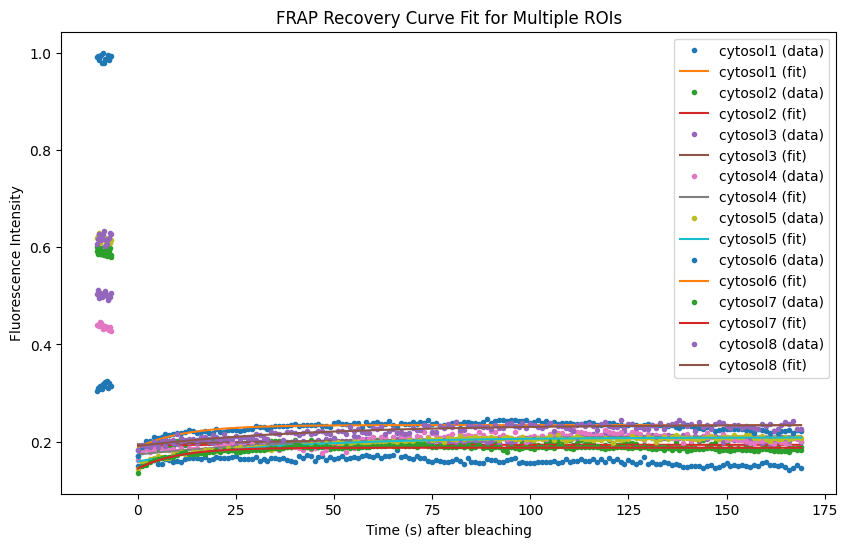

Data saved to 'FRAP_recovery_parameters.csv'


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sys

# Define the exponential recovery model:
# I(t) = I_inf - (I_inf - I0) * exp(-k*t)
def exp_recovery(t, I_inf, I0, k):
    return I_inf - (I_inf - I0) * np.exp(-k * t)

# 1. Load your CSV file with robust error handling.
#filename = r"C:\Users\TzachiHNB4\Desktop\condensates\your_filled_data.csv" # Replace with your CSV file path
#try:
#    data = pd.read_csv(filename).dropna()
#except Exception as e:
#    print(f"Error reading CSV file: {e}")
#    sys.exit(1)

# Check that the required columns are present.
# required_cols = ['Time',   'nucleus1',
#      'cytosol1',
#      'nucleus2',
#     'cytosol2',
#     'nucleus3',
#     'cytosol3'
   
#     ]
# if not all(col in data.columns for col in required_cols):
#     print(f"CSV file must contain columns: {required_cols}")
#     sys.exit(1)

# 2. Extract time and intensity data for all ROIs.
time = data['Axis [s]'].values
roi_columns = [    'cytosol1',
     'cytosol2',
     'cytosol3',
     'cytosol4',
     'cytosol5',
   'cytosol6',
    'cytosol7',
               'cytosol8'
              ]
intensity_data = data[roi_columns].values

# 3. Adjust time to make post-bleach time zero at 10.573
time_adjusted = time - 10.573
print(f"Adjusted time: first 5 values: {time_adjusted[:5]}")  # Print the first 5 values of the adjusted time for verification

# 4. Determine the pre-bleach intensity (I_i) for each ROI.
pre_bleach_mask = time_adjusted < 0
I_i = np.mean(intensity_data[pre_bleach_mask], axis=0)  # Mean of intensity before t=0 for each ROI
print(f"Pre-bleach intensities (I_i): {I_i}")

# 5. Identify the immediate post-bleach intensity (I0) for each ROI.
#    We assume that the bleach occurs at time = 0 (post-bleach start time = 11.346).
idx_t0 = np.argmin(np.abs(time_adjusted - 0))
I0_exp = intensity_data[idx_t0]  # Intensity at post-bleach time (I0) for each ROI
print(f"Immediate post-bleach intensities (I0): {I0_exp}")

# 6. For fitting, use only the recovery portion (t >= 0).
fit_mask = time_adjusted >= 0
time_fit = time_adjusted[fit_mask]
intensity_fit_data = intensity_data[fit_mask]

# 6. Provide initial guesses for the fitting parameters:
#    I_inf_guess: estimated as the average of the last few points (plateau)
#    I0_guess: from the immediate post-bleach intensity
#    k_guess: an arbitrary initial guess for the rate constant
num_points_plateau = min(5, len(time_fit))
I_inf_guess = np.mean(intensity_fit_data[-num_points_plateau:], axis=0)  # Shape (4,) for each ROI
I0_guess = I0_exp  # Shape (4,) for each ROI
k_guess = 0.1  # Same guess for all ROIs

# Adjust the initial guess array to match the required dimensions
# We now create a 2D array where each row corresponds to one ROI, and the columns are I_inf, I0, and k
initial_guess = np.array([I_inf_guess, I0_guess, np.full_like(I0_guess, k_guess)]).T  # Shape (4, 3)

print(f"Initial guesses for each ROI: I_inf = {I_inf_guess}, I0 = {I0_guess}, k = {k_guess}")

# 8. Fit the recovery curve for each ROI using curve_fit with error handling.
popt_all = []
for idx, roi_column in enumerate(roi_columns):
    try:
        popt, pcov = curve_fit(exp_recovery, time_fit, intensity_fit_data[:, idx], p0=initial_guess[idx])
        popt_all.append(popt)
        print(f"Fitted parameters for {roi_column}: I_inf = {popt[0]}, I0 = {popt[1]}, k = {popt[2]}")
    except RuntimeError as e:
        print(f"Error: curve_fit failed for {roi_column}: {e}")
        popt_all.append([np.nan, np.nan, np.nan])  # In case of failure, append NaN values
    except Exception as e:
        print(f"Unexpected error during curve fitting for {roi_column}: {e}")
        popt_all.append([np.nan, np.nan, np.nan])

# 9. Calculate τ (tau), recovery half-time (t_half), and mobile fraction for each ROI.
tau_all, t_half_all, mobile_fraction_all = [], [], []
for idx, roi_column in enumerate(roi_columns):
    I_inf_fit, I0_fit, k_fit = popt_all[idx]
    tau = 1.0 / k_fit if k_fit != 0 else np.inf
    t_half = np.log(2) * tau  # t_half = ln(2)/k = 0.693 * tau
    tau_all.append(tau)
    t_half_all.append(t_half)
    
    # Mobile fraction: (I_inf - I0) / (I_i - I0)
    if (I_i[idx] - I0_fit) != 0:
        mobile_fraction = (I_inf_fit - I0_fit) / (I_i[idx] - I0_fit)
    else:
        mobile_fraction = np.nan  # Avoid division by zero
    mobile_fraction_all.append(mobile_fraction)

    print(f"ROI: {roi_column} - Tau: {tau}, t_half: {t_half}, Mobile Fraction: {mobile_fraction}")

# 10. Save the plot as a PDF
plt.figure(figsize=(10, 6))
for idx, roi_column in enumerate(roi_columns):
    # Plot the experimental data for each ROI
    plt.plot(time_adjusted, intensity_data[:, idx], 'o', label=f'{roi_column} (data)', markersize=3)  # Adjust the size here
    # Plot the fitted recovery curve for each ROI
    t_fit_line = np.linspace(time_fit.min(), time_fit.max(), 200)
    plt.plot(t_fit_line, exp_recovery(t_fit_line, *popt_all[idx]), '-', label=f'{roi_column} (fit)')

plt.xlabel("Time (s) after bleaching")
plt.ylabel("Fluorescence Intensity")
plt.title("FRAP Recovery Curve Fit for Multiple ROIs")
plt.legend()

# Save figure as PDF
plt.savefig("FRAP_recovery_curve.pdf", format="pdf")

# Optionally, display the plot
plt.show()

# 11. Save the data as a CSV
# Creating a DataFrame with the fitted parameters, tau, t_half, and mobile fraction
results_df = pd.DataFrame({
    'ROI': roi_columns,
    'I_inf': [popt[0] for popt in popt_all],
    'I0': [popt[1] for popt in popt_all],
    'k': [popt[2] for popt in popt_all],
    'tau': tau_all,
    't_half': t_half_all,
    'Mobile_Fraction': mobile_fraction_all
})

# Save the DataFrame to CSV
results_df.to_csv("FRAP_recovery_parameters.csv", index=False)
print("Data saved to 'FRAP_recovery_parameters.csv'")
